# **EDA - Report Conclusion**

---

# 1.   Sanity Check

1.   Data has 1100 rows and 7 Columns
2.   Duplicated values: 0
3.   Total Mising values: 0
4.   Columns Dropped: 0

# 2.  Object Mapping
1.   Columns "Day of Week" and "Building Type" were changed into respective integer values by map function

# 3.  Dataset visualization
a. Basic Column Wise Histogram Analysis

b. Analysis On The Basis Of Building Type and Day Of Week

c. Square Footage V/s Energy Consumption

d. Appliances Used V/s Energy Consumption Analysis

e. Number of Occupants V/s Energy Consumption Analysis

g. Average Temperature V/s Energy Consumption Analysis

g. Heatmap Corelation

# 4.  Conclusion:


1.   On the basis of type of building Industrial Building has the highest energy consumption irrespective of Day of Week and have high energy consuming appliances.

2.   Energy consumption on Weekend and Weekdays somewhat remains same although Weekday have slightly higher consumption.

3.  Sqaure Footage and Energy Consumption have highest corelation for a linear realtionship(0.77) and are hence linearly related with positve slope (Intercept:2892.17, Slope:0.050), applied linear regression.

4.  No of appliance does affect energy consumption but is more dependent on type of appliance i.e industrial,commercial,resdiential.

5.  No of Occupants does not severly affect energy consumption as Industrial building with less occupants has more conusmption.

6.  Colder Avg Temperature causes more energy cosnumption and hence has an inverse realtionship.



---







In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [107]:
test_df = pd.read_csv("/content/test_energy_data.csv")
train_df = pd.read_csv("/content/train_energy_data.csv")
df = pd.concat([test_df,train_df], ignore_index=True)
df

,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week,Energy Consumption
0,Residential,24563,15,4,28.52,Weekday,2865.57
1,Commercial,27583,56,23,23.07,Weekend,4283.80
2,Commercial,45313,4,44,33.56,Weekday,5067.83
3,Residential,41625,84,17,27.39,Weekend,4624.30
4,Residential,36720,58,47,17.08,Weekday,4820.59
...,...,...,...,...,...,...,...
1095,Residential,14419,68,44,23.95,Weekend,3661.21
1096,Industrial,12194,7,22,14.67,Weekend,3546.34
1097,Commercial,39562,88,20,32.18,Weekday,5147.21
1098,Residential,8348,67,37,16.48,Weekend,3244.98


##**Sanity** **Check**

In [3]:
df.isnull().sum()

,0
Building Type,0
Square Footage,0
Number of Occupants,0
Appliances Used,0
Average Temperature,0
Day of Week,0
Energy Consumption,0


In [4]:
df.duplicated().sum()

0

In [5]:
df.dtypes

,0
Building Type,object
Square Footage,int64
Number of Occupants,int64
Appliances Used,int64
Average Temperature,float64
Day of Week,object
Energy Consumption,float64


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Building Type        1100 non-null   object 
 1   Square Footage       1100 non-null   int64  
 2   Number of Occupants  1100 non-null   int64  
 3   Appliances Used      1100 non-null   int64  
 4   Average Temperature  1100 non-null   float64
 5   Day of Week          1100 non-null   object 
 6   Energy Consumption   1100 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 60.3+ KB


In [6]:
df.describe()

,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Energy Consumption
count,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000
mean,25500.527273,48.268182,25.730000,22.559745,4168.191273
std,14236.955632,29.127624,14.116209,7.122357,924.278723
min,560.000000,1.000000,1.000000,10.050000,1683.950000
25%,13203.750000,22.000000,13.000000,16.365000,3510.460000
50%,25785.500000,47.000000,26.000000,22.810000,4189.690000
75%,37536.750000,73.000000,38.000000,28.760000,4859.510000
max,49997.000000,99.000000,49.000000,34.990000,6530.600000


##**Basic Histograms Columns Wise**

array([[<Axes: title={'center': 'Square Footage'}>,
        <Axes: title={'center': 'Number of Occupants'}>],
       [<Axes: title={'center': 'Appliances Used'}>,
        <Axes: title={'center': 'Average Temperature'}>],
       [<Axes: title={'center': 'Energy Consumption'}>, <Axes: >]],
      dtype=object)

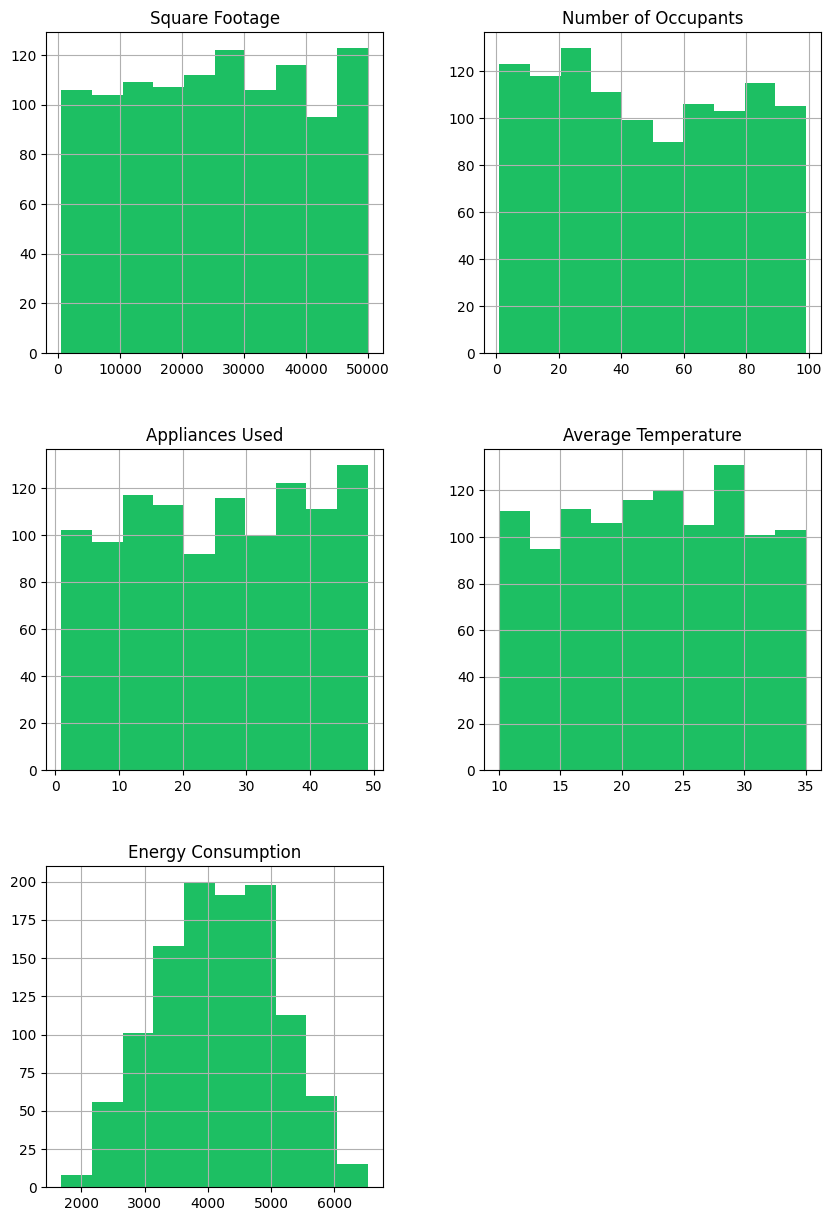

In [109]:
df.hist(color='#1dbf63',figsize=(10,15),bins=10)


# **Analysis On The Basis Of Building Type and Day Of Week**



### **On Building Type**

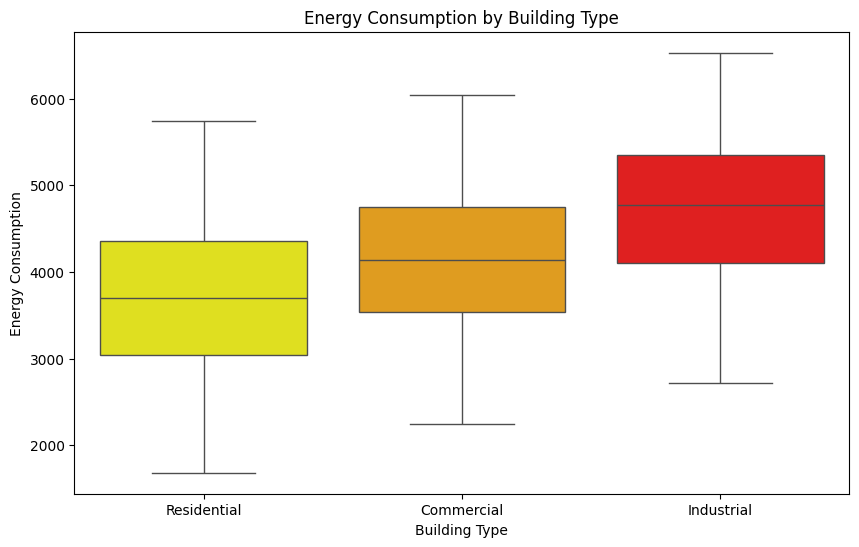

In [47]:
plt.figure(figsize=(10,6))
palette = ["yellow","orange","red"]
sn.boxplot(x='Building Type', y='Energy Consumption', data=df,palette=palette)
plt.title('Energy Consumption by Building Type')
plt.xlabel('Building Type')
plt.ylabel('Energy Consumption')
plt.show()

<Axes: xlabel='Appliances Used', ylabel='Energy Consumption'>

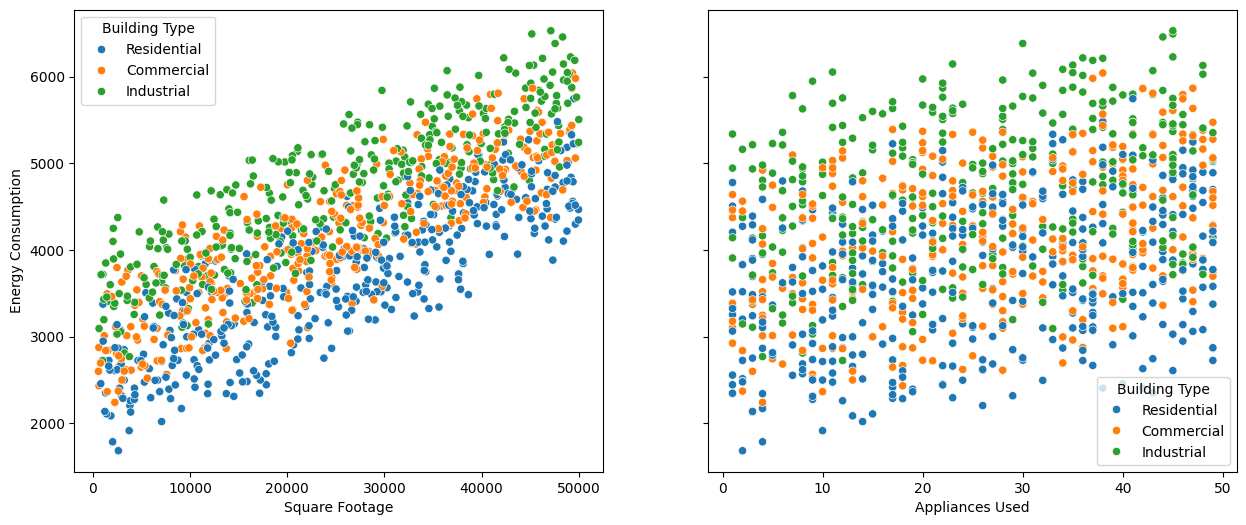

In [122]:
ax=plt.subplots(1,2,sharey=True,figsize=(15,6))
sn.scatterplot(ax=ax[1][0],x=df['Square Footage'],y=df['Energy Consumption'],hue=df['Building Type'])
sn.scatterplot(ax=ax[1][1],x=df['Appliances Used'],y=df['Energy Consumption'],hue=df['Building Type'])

### **On Day Of Week**

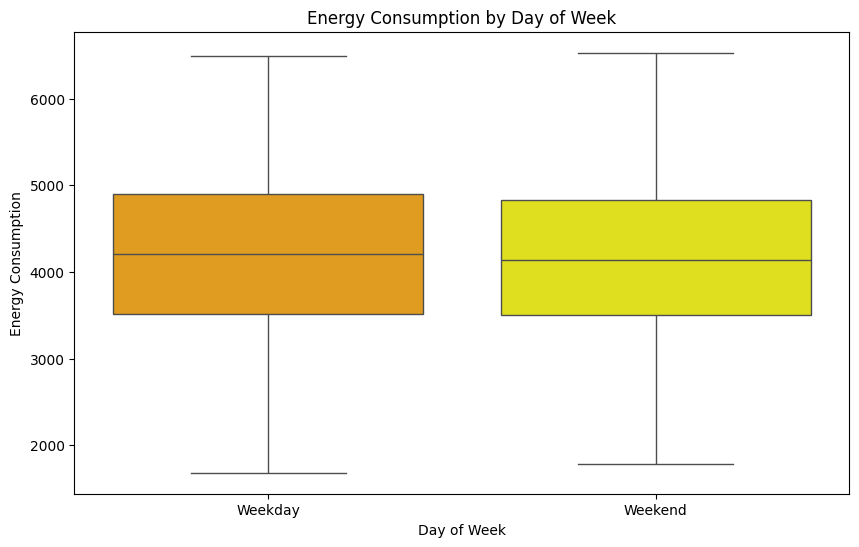

In [124]:
plt.figure(figsize=(10,6))
palette = ["orange","yellow"]
sn.boxplot(x='Day of Week', y='Energy Consumption', data=df,palette=palette)
plt.title('Energy Consumption by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Energy Consumption')
plt.show()

<Axes: xlabel='Appliances Used', ylabel='Energy Consumption'>

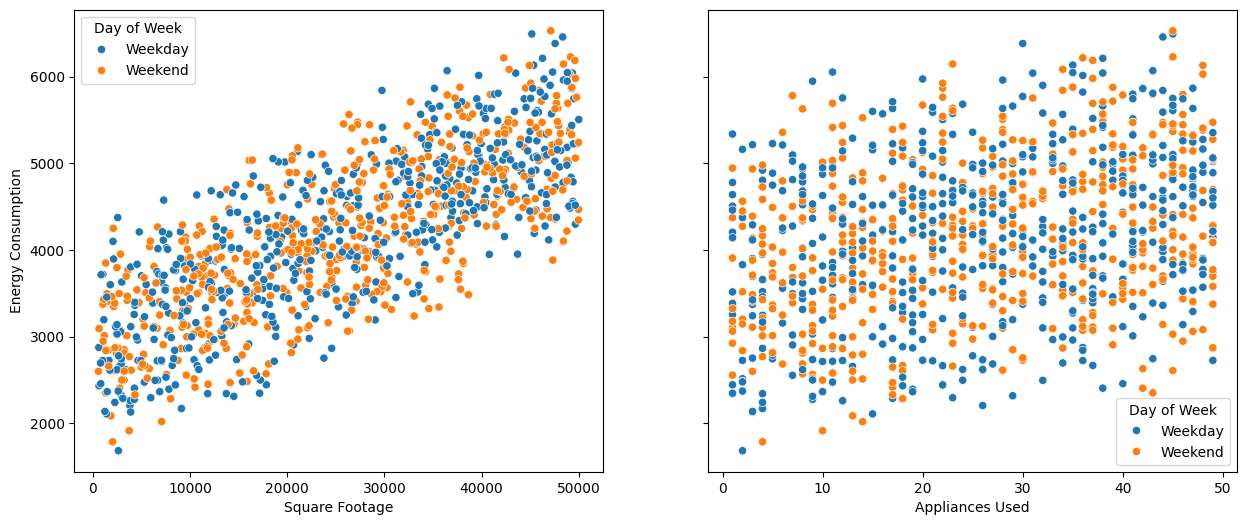

In [123]:
ax=plt.subplots(1,2,sharey=True,figsize=(15,6))
sn.scatterplot(ax=ax[1][0],x=df['Square Footage'],y=df['Energy Consumption'],hue=df['Day of Week'])
sn.scatterplot(ax=ax[1][1],x=df['Appliances Used'],y=df['Energy Consumption'],hue=df['Day of Week'])

### Energy Consumption on Day of Week by Building Type

<Axes: xlabel='Day of Week', ylabel='Energy Consumption'>

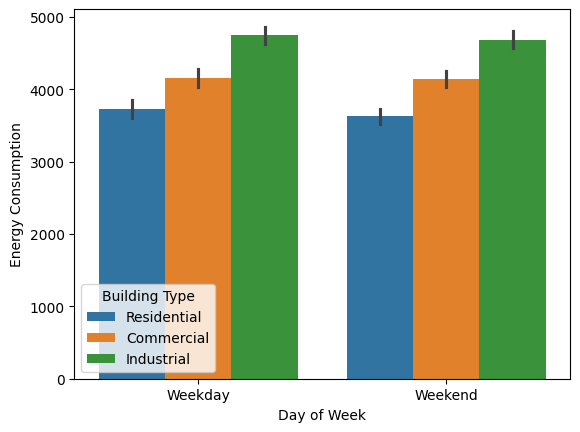

In [125]:
sn.barplot(x=df["Day of Week"],y=df["Energy Consumption"],hue=df["Building Type"])

# **Square Footage V/s Energy Consumption Analysis**

In [24]:
square_footage_corr=df[["Square Footage","Energy Consumption"]].corr()
square_footage_corr['Square Footage']

,Square Footage
Square Footage,1.000000
Energy Consumption,0.770765


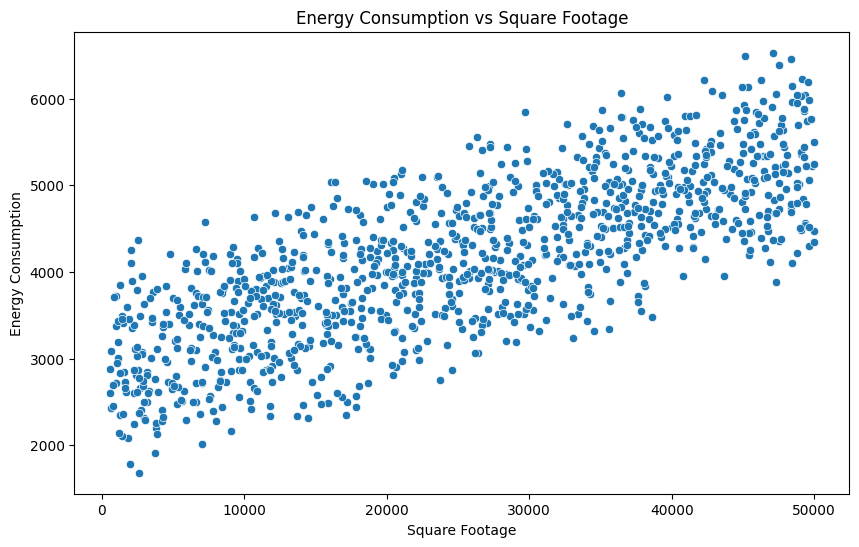

In [110]:
plt.figure(figsize=(10,6))
sn.scatterplot(x="Square Footage",y="Energy Consumption",data=df)
plt.title('Energy Consumption vs Square Footage')
plt.xlabel('Square Footage')
plt.ylabel('Energy Consumption')
plt.show()

In [33]:
#using a linear regression on the plot
from sklearn.linear_model import LinearRegression
square_footage_model = LinearRegression()

x =  df[["Square Footage"]]
y = df['Energy Consumption']

square_footage_model.fit(x,y)
square_footage_prediction = square_footage_model.predict(x)
print(f"Intercept:{square_footage_model.intercept_}, Slope:{square_footage_model.coef_}")

Intercept:2892.1735369572148, Slope:[0.05003888]


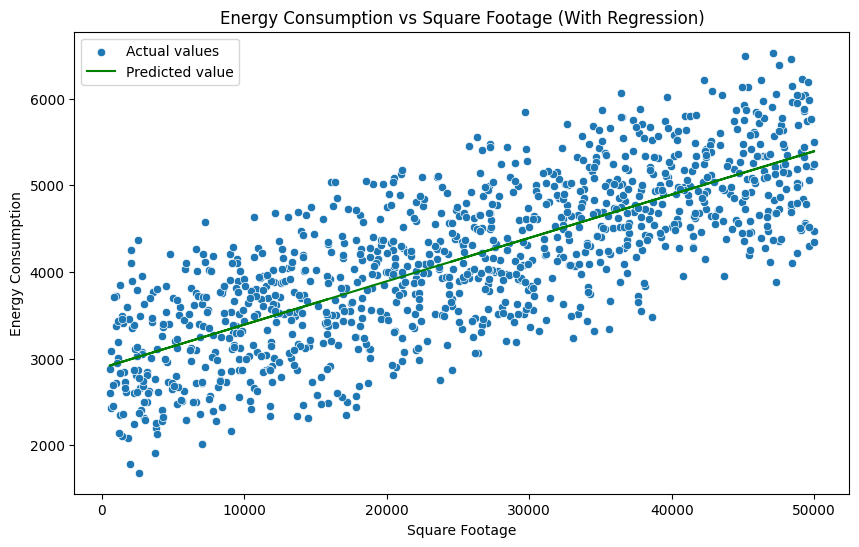

In [35]:
plt.figure(figsize= (10,6))
sn.scatterplot(x="Square Footage",y="Energy Consumption",data=df,label="Actual values" )
plt.plot(x,square_footage_prediction,color="green",label="Predicted value")
plt.legend()
plt.title('Energy Consumption vs Square Footage (With Regression)')
plt.xlabel('Square Footage')
plt.ylabel('Energy Consumption')
plt.show()

# **Appliances Used V/s Energy Consumption Analysis**

Appliances Used       1.000000
Energy Consumption    0.301505
Name: Appliances Used, dtype: float64


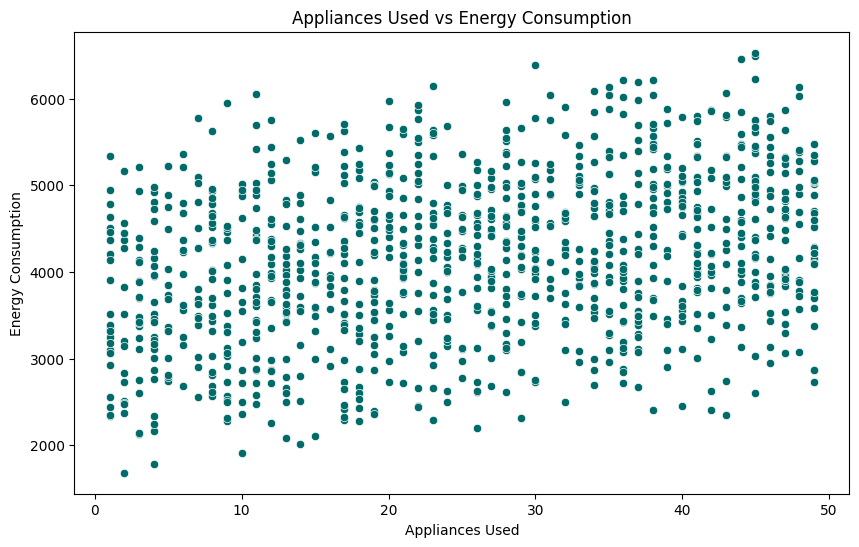

In [115]:
appliances_used_corr=df[["Appliances Used","Energy Consumption"]].corr()
print(appliances_used_corr["Appliances Used"])
plt.figure(figsize=(10,6))
sn.scatterplot(x="Appliances Used",y="Energy Consumption",data=df,color="#006b69")
plt.title("Appliances Used vs Energy Consumption")
plt.xlabel("Appliances Used")
plt.ylabel('Energy Consumption')
plt.show()

# **Number of Occupants V/s Energy Consumption Analysis**

Number of Occupants    1.00000
Energy Consumption     0.35028
Name: Number of Occupants, dtype: float64


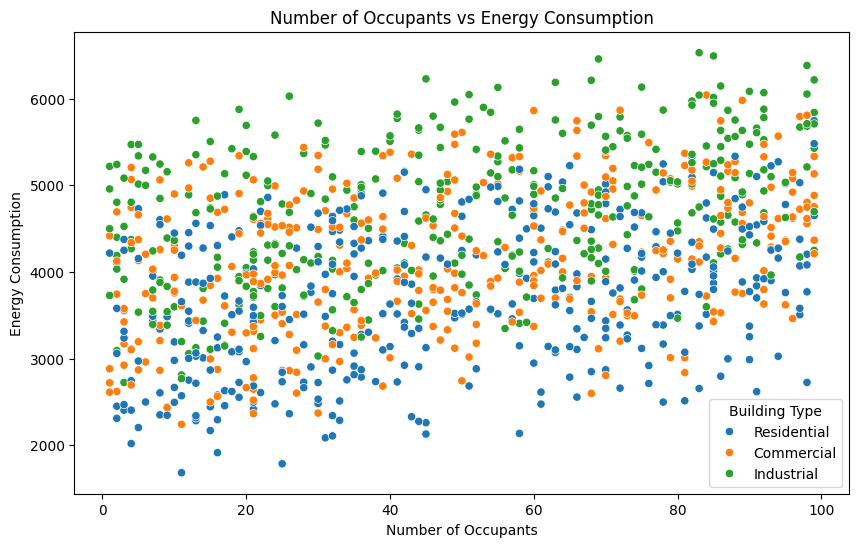

In [126]:
occupants_corr=df[["Number of Occupants","Energy Consumption"]].corr()
print(occupants_corr["Number of Occupants"])
plt.figure(figsize=(10,6))
sn.scatterplot(x="Number of Occupants",y="Energy Consumption",data=df,hue=df["Building Type"])
plt.title("Number of Occupants vs Energy Consumption")
plt.xlabel("Number of Occupants")
plt.ylabel('Energy Consumption')
plt.show()

# **Average Temperature V/s Energy Consumption Analysis**

Average Temperature    1.000000
Energy Consumption    -0.038206
Name: Average Temperature, dtype: float64


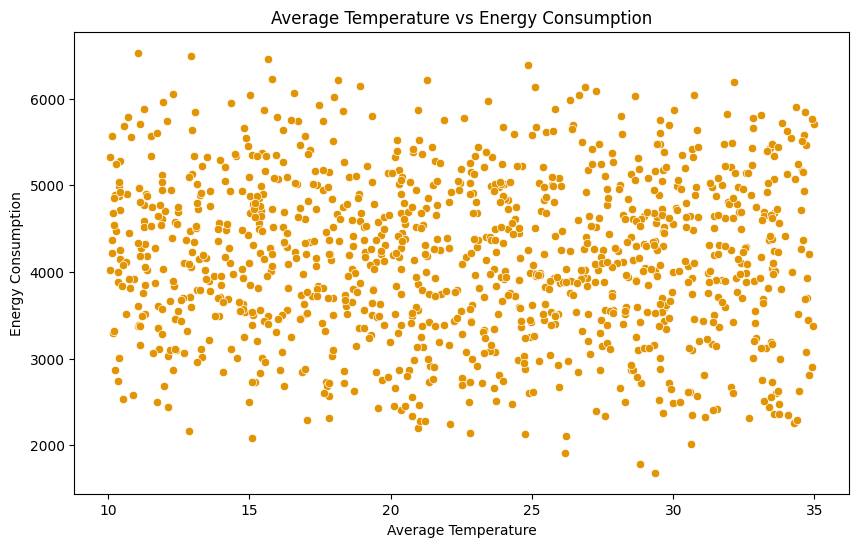

In [113]:
avg_temp_corr=df[["Average Temperature","Energy Consumption"]].corr()
print(avg_temp_corr["Average Temperature"])
plt.figure(figsize=(10,6))
sn.scatterplot(x="Average Temperature",y="Energy Consumption",data=df,color="#e39402")
plt.title("Average Temperature vs Energy Consumption")
plt.xlabel("Average Temperature")
plt.ylabel('Energy Consumption')
plt.show()


# **Corelation Analysis**

In [86]:
print(df['Day of Week'].unique())
print(df['Building Type'].unique())
custom_day_codes = {"Weekday": 1, "Weekend": 2}
custom_building_codes = {"Industrial": 1, "Commercial": 2, "Residential": 3}
df['Day of Week'] = df['Day of Week'].map(custom_day_codes)
df['Building Type'] = df['Building Type'].map(custom_building_codes)
df

['Weekday' 'Weekend']
['Residential' 'Commercial' 'Industrial']


,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week,Energy Consumption
0,3,24563,15,4,28.52,1,2865.57
1,2,27583,56,23,23.07,2,4283.80
2,2,45313,4,44,33.56,1,5067.83
3,3,41625,84,17,27.39,2,4624.30
4,3,36720,58,47,17.08,1,4820.59
...,...,...,...,...,...,...,...
1095,3,14419,68,44,23.95,2,3661.21
1096,1,12194,7,22,14.67,2,3546.34
1097,2,39562,88,20,32.18,1,5147.21
1098,3,8348,67,37,16.48,2,3244.98


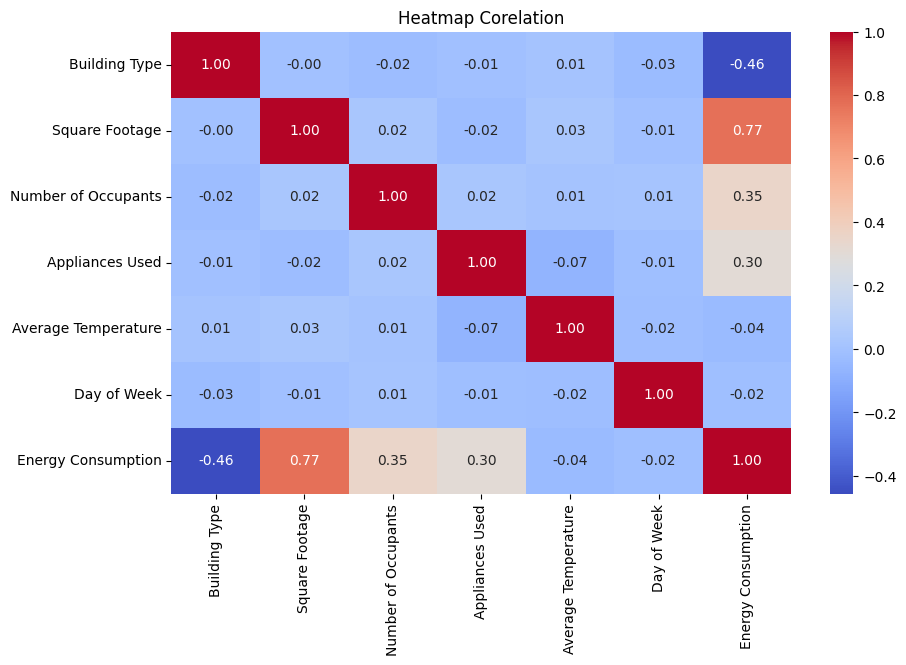

In [92]:
plt.figure(figsize=(10,6))
sn.heatmap(df.corr(),annot=True,fmt='0.2f',cmap="coolwarm")
plt.title('Heatmap Corelation')
plt.show()